# Group Project - Data Cleaning and Exploratory Data Analysis
### 2609-Data Visualization for Business Analytics-2526_T2

- **Author:** Max Haussmann (72633)
- **Last updated:** 2025-11-29  
- **Description:** Data cleaning and exploratory data analysis of Olympic athlete participation.

# Introduction

This Jupyter notebook is the first step in working with the Historical Modern Olympic Games dataset. Our primary objective is to clean the data and perform a exploratory data analysis (EDA) to prepare the data for further visualization.

**Dataset:** 
We are working with the "120 years of Olympic history: athletes and results" dataset. This set contains basic bio data on athletes and medal results from Athens 1896 to Rio 2016. (Find original data here: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)

# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Olympic data
olympic_file = '/Users/max/Desktop/2609_DataVisualization/TeamProject/Olympics_Data/main_olympics.csv'

df_oly = pd.read_csv(olympic_file)

In [2]:
# Display the first few rows
df_oly.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# Get an overview of the whole dataset

def dataoverview(df, message = "Data Overview"):
    print(f"{message}\n")
    print("\nNumber of rows: ", df.shape[0])
    print("\n Number of columns: ", df.shape[1])
    print("\nColumns: ", df.columns.tolist())
    print("\nMissing values: ", df.isnull().sum().values.sum())    
    print("\nUnique values: ", df.nunique())
    print("\nData Types: ", df.dtypes)

dataoverview(df_oly, "Olympics Data Overview")

Olympics Data Overview


Number of rows:  271116

 Number of columns:  15

Columns:  ['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']

Missing values:  363853

Unique values:  ID        135571
Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
dtype: int64

Data Types:  ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object


In [4]:
# Value counts for 'Season' column
print(df_oly['Season'].value_counts())
print('\n')

# Count of unique years for Summer and Winter editions
print('First Summer Edition Year: ', df_oly[df_oly['Season'] == 'Summer']['Year'].min())
print('Latest Summer Edition Year: ', df_oly[df_oly['Season'] == 'Summer']['Year'].max())
print('First Winter Edition Year: ', df_oly[df_oly['Season'] == 'Winter']['Year'].min())
print('Latest Winter Edition Year: ', df_oly[df_oly['Season'] == 'Winter']['Year'].max())
print('\n')

# Number of unique Host Cities
print('Number of unique Host Cities: ', df_oly['City'].nunique())
print('Number of unique Host Cities Summer: ', df_oly[df_oly['Season'] == 'Summer']['City'].nunique())
print('Number of unique Host Cities Winter: ', df_oly[df_oly['Season'] == 'Winter']['City'].nunique())
print('\n') 

# Number of unique sports
print('Number of unique Sports: ', df_oly['Sport'].nunique())
print('Number of unique Sports Summer: ', df_oly[df_oly['Season'] == 'Summer']['Sport'].nunique())
print('Number of unique Sports Winter: ', df_oly[df_oly['Season'] == 'Winter']['Sport'].nunique())


Season
Summer    222552
Winter     48564
Name: count, dtype: int64


First Summer Edition Year:  1896
Latest Summer Edition Year:  2016
First Winter Edition Year:  1924
Latest Winter Edition Year:  2014


Number of unique Host Cities:  42
Number of unique Host Cities Summer:  23
Number of unique Host Cities Winter:  19


Number of unique Sports:  66
Number of unique Sports Summer:  52
Number of unique Sports Winter:  17


In [5]:
# Treat summer and winter games as separate events

df_summer = df_oly[df_oly['Season'] == 'Summer'].copy()
# df_winter = df_oly[df_oly['Season'] == 'Winter'].copy()

***Note:***

From now on we are only focusing on data from the summer olympic dataset. We set the scope to summer because of greater data consistency and historical depth.

In [6]:
# Overview of summer Olympics data
dataoverview(df_summer, "Summer Olympics Data Overview")

Summer Olympics Data Overview


Number of rows:  222552

 Number of columns:  15

Columns:  ['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']

Missing values:  303364

Unique values:  ID        116776
Name      116122
Sex            2
Age           74
Height        95
Weight       219
Team        1157
NOC          230
Games         29
Year          29
Season         1
City          23
Sport         52
Event        651
Medal          3
dtype: int64

Data Types:  ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object


In [7]:
# Detailed missing values for summer Olympics data
print("\nTotal values for summer: ", df_summer.shape[0], 
      "\nMissing values by column: \n", df_summer.isnull().sum())

# Missing values after 1950
df_summer_post1950 = df_summer[df_summer['Year'] >= 1950]
print("\nMissing values in the Summer after 1950: ", df_summer_post1950.isnull().sum())


Total values for summer:  222552 
Missing values by column: 
 ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
dtype: int64

Missing values in the Summer after 1950:  ID             0
Name           0
Sex            0
Age         1930
Height     16428
Weight     16759
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     154329
dtype: int64


***Note:***

At first sight, we are dealing with quite a large number of missing values. However, breaking it down, missing values in the medal column simply means no medal was won by this athlete in this discipline. Remaining missing values appear in age, height, and weight, primarily in older entries from before 1950.



In [8]:
# Deal with missing values for Medal column
df_summer['Medal'].fillna('No Medal', inplace=True)

# Create Medal_Winner column. 1 if medal won, 0 otherwise
df_summer['Medal_Winner'] = df_summer['Medal'].map(lambda x: 0 if x == 'No Medal' else 1)

# Create total_medals column. Count of total medals won by each athlete
df_summer['total_medals'] = df_summer.groupby('ID')['Medal_Winner'].transform(lambda x: (x == 1).sum())

/var/folders/hx/57xnmk_52272gw1nc2jn7nbr0000gn/T/ipykernel_43359/664199848.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_summer['Medal'].fillna('No Medal', inplace=True)


# Exploratory Data Analysis

## Frequency Distribution of Values

#### Nominal, Ordinal, and Binary Variables

Sex
M    163109
F     59443
Name: count, dtype: int64


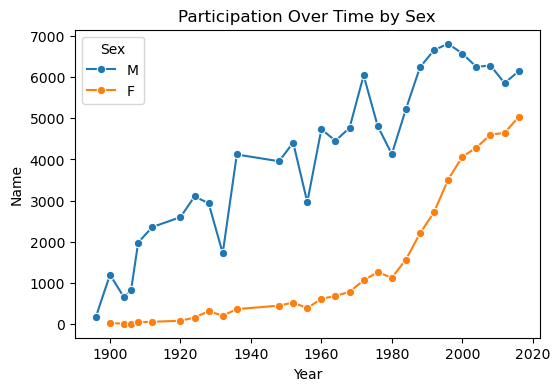

In [9]:
# Value counts of Sex column
print(df_summer['Sex'].value_counts())

# Line chart: Participation over time, male vs. female
participation_over_time = df_summer.groupby(['Year', 'Sex'])['Name'].nunique().reset_index()
plt.figure(figsize=(6, 4))
sns.lineplot(data=participation_over_time, x='Year', y='Name', hue='Sex', marker='o')       
plt.title('Participation Over Time by Sex')
plt.show()

***Note:***

Historically, male participation is significantly higher compared to female. After 1980, also female participation sees a strong increase in participation.

In [10]:
# Team column value counts - Top 10 biggest teams
print(df_summer['Team'].value_counts().head(10))
print('\n')

# NOC column value counts - Top 10 biggest NOCs
print(df_summer['NOC'].value_counts().head(10))
print('\n')

# Count of Teams and NOC
print('Number of unique Teams: ', df_summer['Team'].nunique())
print('Number of unique NOC: ', df_summer['NOC'].nunique())


Team
United States    14526
Great Britain    10309
France           10021
Italy             8051
Germany           7378
Australia         6976
Canada            6689
Japan             6233
Hungary           6089
Sweden            5821
Name: count, dtype: int64


NOC
USA    15064
GBR    10917
FRA    10633
ITA     8217
GER     7622
AUS     7092
CAN     6860
JPN     6336
HUN     6129
SWE     6076
Name: count, dtype: int64


Number of unique Teams:  1157
Number of unique NOC:  230


***Note:***

There are a lot less National Olympic Committees than Teams. This means one NOC can represent multiple Teams in an olympic movement.

In [11]:
# Unique Host Cities
unique_host_cities = df_summer['City'].unique()
print('Number of Unique Host Cities in Summer Olympics: ', len(unique_host_cities))
print('\n')

# Distinct Host City and number of times hosted (till 2016)
host_city_counts = df_summer.groupby('Year')['City'].first().value_counts().reset_index()
host_city_counts

Number of Unique Host Cities in Summer Olympics:  23




,City,count
0,Athina,3
1,London,3
2,Los Angeles,2
3,Paris,2
4,Mexico City,1
5,Beijing,1
6,Sydney,1
7,Atlanta,1
8,Barcelona,1
9,Seoul,1


***Note:***

There are 23 unique host cities for the Summer Olympic Games between 1896 and 2016. Only four cities hosted more than one edition, with London and Athina both hosting three.

In [12]:
# Count Number of Events per Sport
event_counts = df_summer.groupby('Sport')['Event'].nunique().reset_index().sort_values(by='Event', ascending=False)
event_counts.rename(columns={'Event': 'Number_of_Events'}, inplace=True)
display(event_counts)
print('\n')

# N umber of appearances per Sport
sport_appearances = df_summer.groupby('Sport')['Year'].nunique().reset_index().sort_values(by='Year', ascending=False)
sport_appearances.rename(columns={'Year': 'Number_of_Appearances'}, inplace=True)
display(sport_appearances)
print('\n')

# Total medal available
total_medals_available = df_summer['Medal_Winner'].value_counts()
print('Total medals available in Summer Olympics: ', total_medals_available)

,Sport,Number_of_Events
4,Athletics,83
38,Shooting,83
40,Swimming,55
14,Cycling,44
37,Sailing,38
51,Wrestling,30
2,Archery,29
3,Art Competitions,29
21,Gymnastics,27
11,Canoeing,27


,Sport,Number_of_Appearances
21,Gymnastics,29
40,Swimming,29
17,Fencing,29
4,Athletics,29
14,Cycling,29
34,Rowing,28
51,Wrestling,28
38,Shooting,27
49,Water Polo,27
15,Diving,27




Total medals available in Summer Olympics:  Medal_Winner
0    188464
1     34088
Name: count, dtype: int64


***Note:***

Some sports have only been included a few times, or even just once, in the Summer Olympics. These are often demonstration or trial events that are added because they are popular in the host country, but participation is limited internationally. When identifying patterns and interpreting the results of our analysis, this variability in sport inclusion must be considered.

#### Continous Variables

In [13]:
# Function to describe a specific, continous, column
def describe_column(df, column):
  print(column, " -- Description") # Print the column name called
  desc_df = df[column].describe().to_frame().reset_index() #Summary statistics. Convert the result to a DataFrame for readability
  desc_df.rename(columns={'index': 'statistic', column: 'value'}, inplace=True) # Rename the columns

  # Round numeric values
  desc_df['value'] = desc_df['value'].round(2)
  return desc_df

In [14]:
# Desribe Age, Height, Weight, total_medals columns: Count, mean, std, min, 25%, 50%, 75%, max
print(describe_column(df_summer, 'Age'), "\n")
print(describe_column(df_summer, 'Height'), "\n")
print('\n',describe_column(df_summer, 'Weight'), "\n")
print('\n',describe_column(df_summer, 'total_medals'))

Age  -- Description
  statistic      value
0     count  213363.00
1      mean      25.67
2       std       6.70
3       min      10.00
4       25%      21.00
5       50%      24.00
6       75%      28.00
7       max      97.00 

Height  -- Description
  statistic      value
0     count  170695.00
1      mean     175.52
2       std      10.91
3       min     127.00
4       25%     168.00
5       50%     175.00
6       75%     183.00
7       max     226.00 

Weight  -- Description

   statistic      value
0     count  168698.00
1      mean      70.69
2       std      14.80
3       min      25.00
4       25%      60.00
5       50%      70.00
6       75%      79.00
7       max     214.00 

total_medals  -- Description

   statistic      value
0     count  222552.00
1      mean       0.54
2       std       1.26
3       min       0.00
4       25%       0.00
5       50%       0.00
6       75%       1.00
7       max      28.00


In [15]:
# Oldest Athlete Ever
oldest_athlete = df_summer.loc[df_summer['Age'].idxmax()]
print('\nOldest Athlete Ever in Summer Olympics:')
print(oldest_athlete[['Name', 'Age', 'Year', 'Sport', 'Event', 'Team']])


Oldest Athlete Ever in Summer Olympics:
Name                          John Quincy Adams Ward
Age                                             97.0
Year                                            1928
Sport                               Art Competitions
Event    Art Competitions Mixed Sculpturing, Statues
Team                                   United States
Name: 257054, dtype: object


In [16]:
# Most successful athlete (most medals won)
most_successful_athlete = df_summer.loc[df_summer['total_medals'].idxmax()]
print('\nMost Successful Athlete in Summer Olympics:')
print(most_successful_athlete[['Name', 'total_medals', 'Year', 'Sport', 'Team']])


Most Successful Athlete in Summer Olympics:
Name            Michael Fred Phelps, II
total_medals                         28
Year                               2000
Sport                          Swimming
Team                      United States
Name: 187887, dtype: object


***Note:***
- Age: The average age in summer olympic games is between 25 and 26 years old with 75% of athletes 28 years of age or younger. The age ranges from 10 to 97 years. (Interesting: "His work was part of the sculpture event in the art competition at the 1928 Summer Olympics." - Wikipedia: https://en.wikipedia.org/wiki/John_Quincy_Adams_Ward. However, Ward died in 1910, so only his work competed)
- Height: The average Olympian Athlete is about 176 cm tall. Height varies from 127 cm up to 226.
- Weight: The average weight of an athlete at the Olympics is 70 kg. There is quite big variance in weight, which makes sense due to the greatly varying characteristics of different sports.
- Total Medals: Historically, a minimum of 50% of the entries did not win any medal. The most successful athlete, Michael Phelps, won 28 medals. 

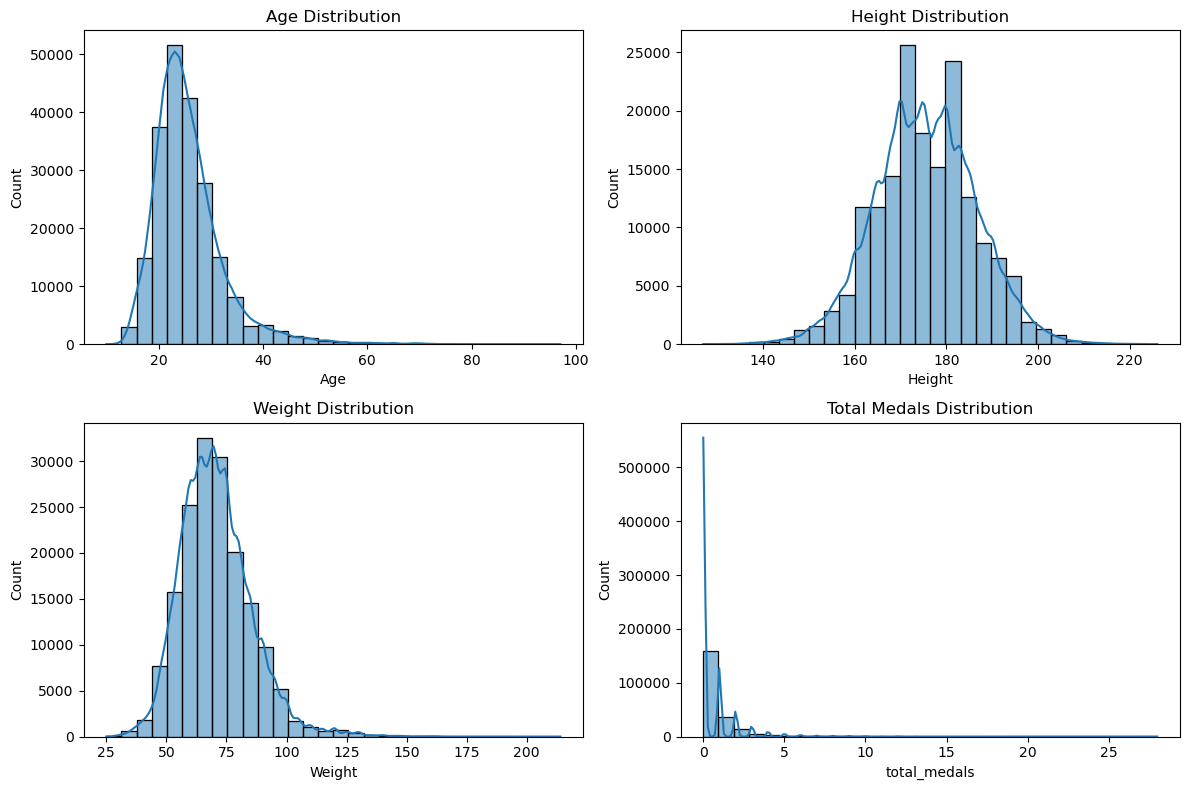

In [17]:
# Frequency distributions for Age, Height, Weight, total_medals columns
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df_summer['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.subplot(2, 2, 2)
sns.histplot(df_summer['Height'].dropna(), bins=30, kde=True)
plt.title('Height Distribution')
plt.subplot(2, 2, 3)
sns.histplot(df_summer['Weight'].dropna(), bins=30, kde=True)
plt.title('Weight Distribution')
plt.subplot(2, 2, 4)
sns.histplot(df_summer['total_medals'].dropna(), bins=30, kde=True)
plt.title('Total Medals Distribution')
plt.tight_layout()
plt.show()

BMI  -- Description
  statistic      value
0     count  167361.00
1      mean      22.72
2       std       3.00
3       min       8.36
4       25%      20.90
5       50%      22.46
6       75%      24.11
7       max      63.90


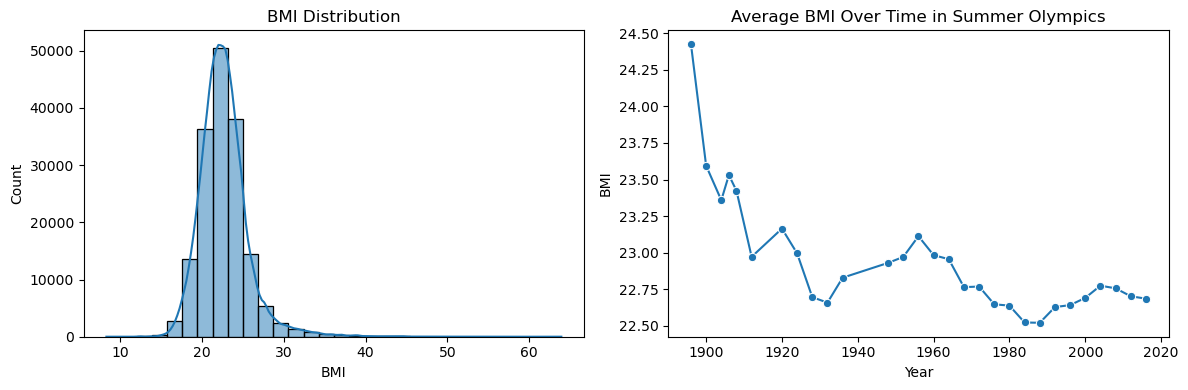

In [18]:
# Exploring a potential measure for Visualization: BMI (Body Mass Index)
# BMI Formula = [Weight (in kg) / Height (in cm)^2] x 10.000

df_summer['BMI'] = (df_summer['Weight'] / (df_summer['Height'] ** 2)) * 10000

# Look at BMI distribution
print(describe_column(df_summer, 'BMI'))

# Plot BMI distribution and BMI over time
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df_summer['BMI'].dropna(), bins=30, kde=True, ax=axes[0]); axes[0].set_title('BMI Distribution')
sns.lineplot(data=df_summer.groupby('Year')['BMI'].mean().reset_index(), x='Year', y='BMI', marker='o', ax=axes[1]); axes[1].set_title('Average BMI Over Time in Summer Olympics')
plt.tight_layout()
plt.show()

***Note:***

BMI could be an interesting additional measure to compare with a countries average. Interesting is the strong decline in early years. Further the lowest in the late 80s and increase around 2000.

# Exploring Some Correlations

#### BMI vs. Medals Won

In [19]:
# Drop rows with missing BMI or Medal_Winner for further analysis
df_clean = df_summer.dropna(subset=['BMI', 'Medal_Winner'])

# Correlation between BMI and Medal_Winner
overall_corr = df_clean['BMI'].corr(df_clean['Medal_Winner'])
print(f"\nOverall Correlation (BMI vs Medal_Winner): {overall_corr:.4f}")

# By gender
print("\nBy Gender:")
for sex in df_clean['Sex'].unique():
    corr = df_clean[df_clean['Sex']==sex]['BMI'].corr(
        df_clean[df_clean['Sex']==sex]['Medal_Winner'])
    print(f"  {sex}: {corr:.4f}")


Overall Correlation (BMI vs Medal_Winner): 0.0553

By Gender:
  M: 0.0620
  F: 0.0811


In [20]:
# Only looking at top 10 sports by medal count
top_sports = df_clean[df_clean['Medal_Winner']==1].groupby('Sport').size().nlargest(10)

# Calculate stats for each sport
sport_stats = []
for sport in top_sports.index:
    sport_data = df_clean[df_clean['Sport'] == sport]
    winners = sport_data[sport_data['Medal_Winner'] == 1]
    non_winners = sport_data[sport_data['Medal_Winner'] == 0]
    
    sport_stats.append({
        'Sport': sport,
        'Correlation': sport_data['BMI'].corr(sport_data['Medal_Winner']),
        'Winner_BMI': winners['BMI'].mean(),
        'NonWinner_BMI': non_winners['BMI'].mean(),
        'BMI_Diff': winners['BMI'].mean() - non_winners['BMI'].mean(),
        'N_Medals': len(winners)
    })

sport_df = pd.DataFrame(sport_stats)
print("\n", sport_df.to_string(index=False))



      Sport  Correlation  Winner_BMI  NonWinner_BMI  BMI_Diff  N_Medals
 Athletics     0.039755   22.458287      22.041294  0.416993      3653
  Swimming     0.042183   22.201489      21.964306  0.237183      2487
    Rowing     0.027256   23.527199      23.395618  0.131581      2105
    Hockey    -0.024282   22.841567      22.942325 -0.100758      1168
Gymnastics    -0.034461   20.990870      21.302948 -0.312078      1161
   Fencing     0.010060   22.658849      22.607322  0.051527      1109
  Football     0.023331   22.904923      22.817303  0.087620      1084
  Canoeing     0.055653   24.113585      23.859933  0.253652      1041
Basketball    -0.002312   23.284128      23.294658 -0.010530      1000
 Wrestling     0.023014   25.205479      24.955502  0.249977       972


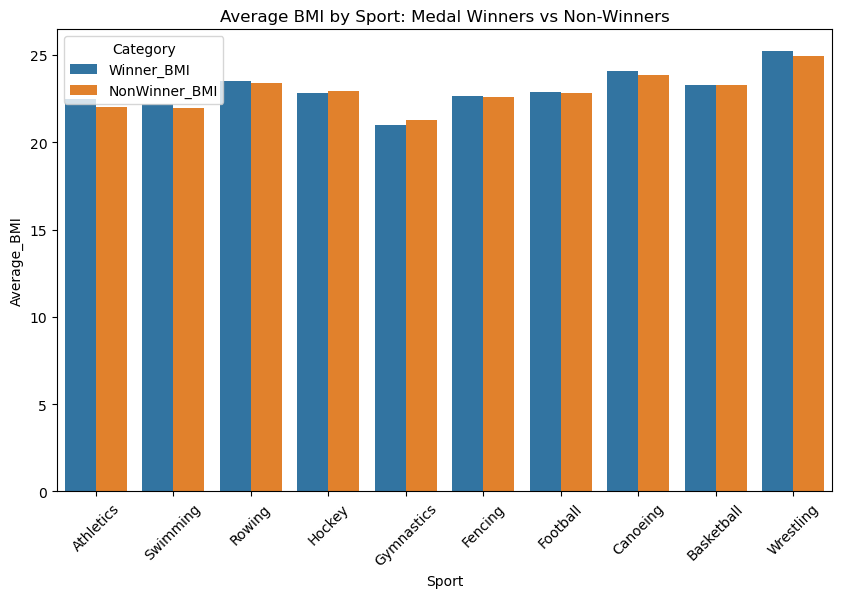

In [21]:
# Create bar chart for BMI by sport, comparing by medal winners vs. non-winners
plt.figure(figsize=(10, 6))
sport_melted = sport_df.melt(id_vars='Sport', value_vars=['Winner_BMI', 'NonWinner_BMI'], 
                             var_name='Category', value_name='Average_BMI')
sns.barplot(data=sport_melted, x='Sport', y='Average_BMI', hue='Category')
plt.title('Average BMI by Sport: Medal Winners vs Non-Winners')
plt.xticks(rotation=45)
plt.show()

***Note:***

The analysis revealed no clear correlation between BMI and medal success. Overall, the correlation was weak with just 0.055, and the sport-specific correlations ranging from -0.034 to 0.056. Although different sports have distinct optimal BMI ranges, BMI proves to be a poor predictor of medal outcomes within each sport. This suggests that factors such as technique, training, and strategy are far more important than body composition alone. One interesting area for further analysis would be to compare the BMIs of medal winners to the average BMIs of their home countries, which could reveal whether elite athletes differ systematically from the general population in ways that vary by nation or region.

#### Age vs. Medal Winner

In [22]:
df_summer[df_summer['Medal_Winner']==1].groupby('Sport').size().nlargest(20)
                                                                

Sport
Athletics        3969
Swimming         3048
Rowing           2945
Gymnastics       2256
Fencing          1743
Football         1571
Hockey           1528
Wrestling        1296
Cycling          1263
Sailing          1232
Shooting         1228
Canoeing         1165
Basketball       1080
Handball         1060
Water Polo       1057
Volleyball        969
Equestrianism     965
Boxing            944
Weightlifting     646
Judo              547
dtype: int64

In [23]:
# Drop rows with missing Age or Medal_Winner
df_clean = df_summer.dropna(subset=['Age', 'Medal_Winner'])

# 3 categories for top sports (5 per category)
sport_categories = {
    'Power/Speed': ['Athletics', 'Swimming', 'Gymnastics', 'Wrestling', 'Cycling'],
    'Skill/Precision': ['Fencing', 'Canoeing', 'Rowing', 'Sailing', 'Shooting'],
    'Team Sports': ['Hockey', 'Football', 'Basketball', 'Handball', 'Volleyball']
}

top_sport_cat = ['Athletics', 'Swimming', 'Gymnastics', 'Wrestling', 'Cycling',
                 'Fencing', 'Canoeing', 'Rowing', 'Sailing', 'Shooting',
                 'Hockey', 'Football', 'Basketball', 'Handball', 'Volleyball']

# Map sports to categories
sport_to_category = {}
for category, sports in sport_categories.items():
    for sport in sports:
        sport_to_category[sport] = category

# Filter to top sports only
df_top10 = df_clean[df_clean['Sport'].isin(top_sport_cat)]
df_top10['Sport_Type'] = df_top10['Sport'].map(sport_to_category)

# Overall correlation between Age and Medal_Winner in top 10 sports
overall_corr = df_top10['Age'].corr(df_top10['Medal_Winner'])
print(f"\nOverall Correlation (Top 10 Sports): {overall_corr:.4f}")



Overall Correlation (Top 10 Sports): 0.0340


/var/folders/hx/57xnmk_52272gw1nc2jn7nbr0000gn/T/ipykernel_43359/2049183161.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10['Sport_Type'] = df_top10['Sport'].map(sport_to_category)


In [24]:
# Correlation by Sport type

type_stats = []
for sport_type in ['Power/Speed', 'Skill/Precision', 'Team Sports']:
    type_data = df_top10[df_top10['Sport_Type'] == sport_type]
    winners = type_data[type_data['Medal_Winner'] == 1]
    non_winners = type_data[type_data['Medal_Winner'] == 0]
    
    corr = type_data['Age'].corr(type_data['Medal_Winner'])
    
    type_stats.append({
        'Sport_Type': sport_type,
        'Correlation': corr,
        'Winner_Age': winners['Age'].mean(),
        'NonWinner_Age': non_winners['Age'].mean(),
        'Age_Diff': winners['Age'].mean() - non_winners['Age'].mean(),
        'N_Winners': len(winners)
    })
    
    print(f"  {sport_type}: {corr:.4f}")

type_df = pd.DataFrame(type_stats)

# Display the results
print("\n", type_df.to_string(index=False))

  Power/Speed: 0.0135
  Skill/Precision: -0.0271
  Team Sports: 0.0452

      Sport_Type  Correlation  Winner_Age  NonWinner_Age  Age_Diff  N_Winners
    Power/Speed     0.013476   23.723561      23.520987  0.202575      11659
Skill/Precision    -0.027056   28.385876      28.900274 -0.514398       8057
    Team Sports     0.045226   25.396088      24.986390  0.409698       6135


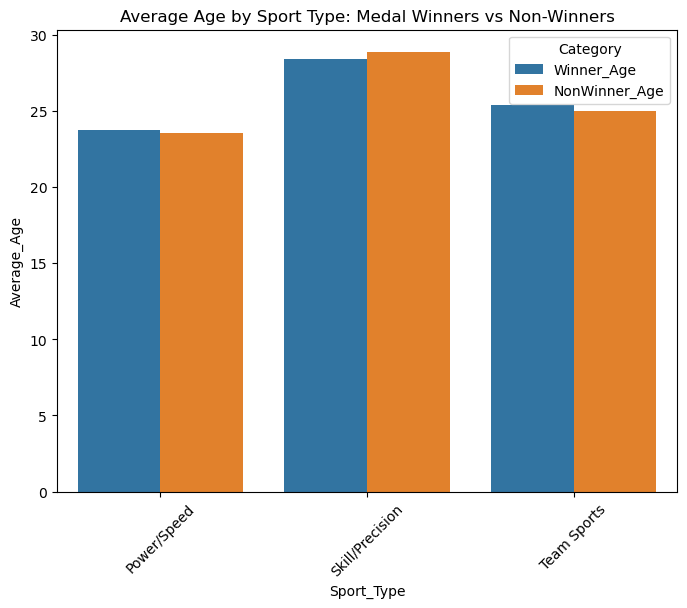

In [25]:
# Bar chart for Age by Sport Type, comparing by medal winners vs. non-winners
plt.figure(figsize=(8, 6))
type_melted = type_df.melt(id_vars='Sport_Type', value_vars=['Winner_Age', 'NonWinner_Age'], 
                           var_name='Category', value_name='Average_Age')
sns.barplot(data=type_melted, x='Sport_Type', y='Average_Age', hue='Category')
plt.title('Average Age by Sport Type: Medal Winners vs Non-Winners')
plt.xticks(rotation=45)
plt.show()


***Note:***

The analysis revealed a weak positive correlation (r = 0.048) between age and medal success in the top 15 Olympic sports. This suggests that age plays a minor role in predicting overall medal outcomes. However, examining sport type categories reveals more nuanced patterns. Power/speed sports (athletics, swimming, gymnastics, and wrestling) have younger medal winners on average, while skill/precision sports (fencing, canoeing, and rowing) and team sports have slightly older medal winners. These results support the idea that the age at which athletes perform at their best varies by sport. Explosive power sports favor younger athletes in their physical prime, while technical and endurance-based sports allow athletes to compete successfully at older ages, when experience and refined technique become more valuable.

# Data Curation and EDA Summary

After careful consideration during the exploratory data analysis phase, particularly of the substantial variance in the data from the early Olympic Games, the decision was made to filter the dataset to allow for a more reliable analysis. The early Olympics included unusual events, such as art competitions, where medals were awarded to artists rather than athletes. In some cases, medals were awarded posthumously. Additionally, one-off sports such as tug-of-war, croquet, and jeu de paume appeared sporadically throughout Olympic history, creating inconsistencies in the data. **To ensure consistency and generate reliable insights for trend discovery and comparison, the analysis will focus exclusively on sports that have been contested in at least ten editions of the Olympic Games.** This filtering criterion establishes a robust foundation for identifying meaningful patterns in athletic performance while eliminating anomalies from discontinued or irregularly featured events.

In [26]:
# Check sport participation
sport_summary = df_summer.groupby('Sport').agg({
    'ID': 'count',  # Total athletes
    'Medal_Winner': 'sum',  # Total medals
    'Year': 'nunique'  # Number of Olympics it appeared in
}).rename(columns={'ID': 'Total_Athletes', 'Medal_Winner': 'Total_Medals', 'Year': 'Num_Olympics'})



# Sort by participation
sport_summary = sport_summary.sort_values('Total_Athletes', ascending=False)

# Filter to major sports
major_sports = sport_summary[
    (sport_summary['Num_Olympics'] >= 10) & 
    (sport_summary['Total_Athletes'] >= 1000)
].index.tolist()

df_major = df_summer[df_summer['Sport'].isin(major_sports)]

print(f"Major sports identified: {len(major_sports)}")
print(f"Records in major sports: {len(df_major):,} ({len(df_major)/len(df_summer)*100:.1f}%)")

Major sports identified: 24
Records in major sports: 209,531 (94.1%)


In [27]:
df_countries = pd.read_csv('/Users/max/Desktop/2609_DataVisualization/TeamProject/Olympics_Data/country_definitions.csv')

df_summer_full = df_major.merge(df_countries, how='left', left_on='NOC', right_on='NOC')


In [28]:
df_major.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_Winner,total_medals,BMI
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0,0,24.691358
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0,0,20.761246
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,0,0,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal,0,0,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,No Medal,0,0,NaN


In [29]:
df_summer_full.to_csv('summer_olympics_base.csv', index=False)
